In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading in the dataset
adult_df = pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capitial-gain','capital-loss','hours-per-week','native-country','earnings']);
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitial-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Checking if there are null values in the dataset
adult_df.isnull().values.any()

False

In [4]:
#One Hot Encoding
adult_cleaned_df = pd.get_dummies(adult_df)
adult_cleaned_df = adult_cleaned_df.drop(['workclass_ ?','occupation_ ?','native-country_ ?','sex_ Female','earnings_ <=50K'],axis=1)
adult_cleaned_df

,age,fnlwgt,education-num,capitial-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,earnings_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
#Scaling Continuous variables
scaler = MinMaxScaler()
adult_scaled_df = adult_cleaned_df.copy()
adult_scaled_df[['age','fnlwgt','education-num','capitial-gain','capital-loss','hours-per-week']] = scaler.fit_transform(adult_scaled_df[['age','fnlwgt','education-num','capitial-gain','capital-loss','hours-per-week']])
adult_scaled_df

,age,fnlwgt,education-num,capitial-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,earnings_ >50K
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

lg_accuracy_train = []
lg_roc_auc_train = []
lg_f1_train = []
lg_precision_train = []

lg_accuracy_test = []
lg_roc_auc_test = []
lg_f1_test = []
lg_precision_test = []

lg_Y_pred_list = []
lg_Y_test_list = []

C_val = [1e-8,1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

# 5 Trials
for i in range(10):
    #Random 5000 per trial
    adult_shuffle_df = adult_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = adult_shuffle_df.iloc[:5000,0:-1],adult_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = adult_shuffle_df.iloc[:5000,-1],adult_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    pipe = Pipeline([('classifier', LogisticRegression())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': C_val},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','sag','newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': C_val}
                ]

    # Create grid search 
    clf_lg = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    best_model = clf_lg.fit(X_train, Y_train)
    
    # Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        heat_results = pd.DataFrame( best_model.cv_results_['params'])
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    heat_results['score_acc_'+ str(i+1)] = 1 - best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_lg_1 = pipe.set_params(**best_acc_param)
    acc_lg = acc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ACC Trial #',i,':',acc_lg.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    lg_accuracy_train.append(acc_lg.score(X_train,Y_train))
    print('LG_ACC Test #',i,':',acc_lg.score(X_test,Y_test)) # Testing Scores
    lg_accuracy_test.append(acc_lg.score(X_test,Y_test))
    
    roc_auc_lg_1 = pipe.set_params(**best_roc_auc_param)
    roc_auc_lg = roc_auc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    lg_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1]))
    print('LG_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1])) # Testing Scores
    lg_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1]))
    
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Appending each trial together to see the overall ROC curve
    lg_Y_pred_list.append(roc_auc_lg.predict_proba(X_test)[:,1])
    lg_Y_test_list.append(Y_test)
                             
                             
    f1_lg_1 = pipe.set_params(**best_f1_param)
    f1_lg = f1_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('LG_F1 Trial #',i,':', f1_score(Y_train,f1_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_f1_train.append(f1_score(Y_train,f1_lg.predict(X_train)))                        
    print('LG_F1 Test #',i,':',f1_score(Y_test,f1_lg.predict(X_test))) # Testing Scores
    lg_f1_test.append(f1_score(Y_test,f1_lg.predict(X_test)))                             
                             
    precision_lg_1 =pipe.set_params(**best_precision_param)
    precision_lg =  precision_lg_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('LG_Precision Trial #',i,':',average_precision_score(Y_train,precision_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_precision_train.append(average_precision_score(Y_train,precision_lg.predict(X_train)))
    print('LG_Precision Test #',i,':',average_precision_score(Y_test,precision_lg.predict(X_test))) # Testing Scores
    lg_precision_test.append(average_precision_score(Y_test,precision_lg.predict(X_test)))             

LG_ACC Trial # 0 : 0.8516
LG_ACC Test # 0 : 0.8489532310148398
LG_ROC_AUC_OVR Trial # 0 : 0.9126006824404291
LG_ROC_AUC Test # 0 : 0.9034809518829652
LG_F1 Trial # 0 : 0.6716814159292036
LG_F1 Test # 0 : 0.6599134057675026
LG_Precision Trial # 0 : 0.42920602966265264
LG_Precision Test # 0 : 0.4547448197684968
LG_ACC Trial # 1 : 0.8566
LG_ACC Test # 1 : 0.8501142919342549
LG_ROC_AUC_OVR Trial # 1 : 0.9111251322675666
LG_ROC_AUC Test # 1 : 0.9043395465231049
LG_F1 Trial # 1 : 0.6676122931442081
LG_F1 Test # 1 : 0.654137214137214
LG_Precision Trial # 1 : 0.44697885646217983
LG_Precision Test # 1 : 0.4485561277661943
LG_ACC Trial # 2 : 0.8594
LG_ACC Test # 2 : 0.8487355320924495
LG_ROC_AUC_OVR Trial # 2 : 0.907195278490903
LG_ROC_AUC Test # 2 : 0.9045017607977754
LG_F1 Trial # 2 : 0.6638217164532955
LG_F1 Test # 2 : 0.6505563859823948
LG_Precision Trial # 2 : 0.4189481396925053
LG_Precision Test # 2 : 0.4447326044847064
LG_ACC Trial # 3 : 0.865
LG_ACC Test # 3 : 0.8481550016327419
LG_ROC_A

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svm_accuracy_train = []
svm_roc_auc_train = []
svm_f1_train = []
svm_precision_train = []

svm_accuracy_test = []
svm_roc_auc_test = []
svm_f1_test = []
svm_precision_test = []

svm_Y_pred_list = []
svm_Y_test_list = []

C_val_svm = [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

for i in range(10):
    #Random 5000 per trial
    adult_shuffle_df = adult_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = adult_shuffle_df.iloc[:5000,0:-1],adult_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = adult_shuffle_df.iloc[:5000,-1],adult_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    svm_pipe = Pipeline([('svm_classifier', SVC())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    svm_search_space = [{'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['poly'],
                 'svm_classifier__degree': [2,3],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['linear'],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['rbf'],
                 'svm_classifier__gamma': [.001,.005,.01,.05,.1,.5,1,2],
                 'svm_classifier__C': C_val_svm}
                ]
        
    # Create grid search 
    clf_svm = GridSearchCV(svm_pipe, svm_search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    svm_best_model = clf_svm.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        svm_heat_results = pd.DataFrame( svm_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    svm_heat_results['score_acc_'+ str(i+1)] = 1 - svm_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = svm_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    svm_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_svm_1 = svm_pipe.set_params(**best_acc_param)
    acc_svm = acc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ACC Trial #',i,':',acc_svm.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    svm_accuracy_train.append(acc_svm.score(X_train,Y_train))
    print('SVM_ACC Test #',i,':',acc_svm.score(X_test,Y_test)) # Testing Scores
    svm_accuracy_test.append(acc_svm.score(X_test,Y_test))
    
    #https://stats.stackexchange.com/questions/254710/is-it-better-to-compute-a-roc-curve-using-predicted-probabilities-or-distances-f
    roc_auc_svm_1 = svm_pipe.set_params(**best_roc_auc_param)
    roc_auc_svm = roc_auc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train)))
    print('SVM_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test))) # Testing Scores
    svm_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test)))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    svm_Y_pred_list.append(roc_auc_svm.decision_function(X_test))
    svm_Y_test_list.append(Y_test)
    
    f1_svm_1 = svm_pipe.set_params(**best_f1_param)
    f1_svm = f1_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('SVM_F1 Trial #',i,':', f1_score(Y_train,f1_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_f1_train.append(f1_score(Y_train,f1_svm.predict(X_train)))                        
    print('SVM_F1 Test #',i,':',f1_score(Y_test,f1_svm.predict(X_test))) # Testing Scores
    svm_f1_test.append(f1_score(Y_test,f1_svm.predict(X_test)))                             
                             
    precision_svm_1 = svm_pipe.set_params(**best_precision_param)
    precision_svm =  precision_svm_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('SVM_Precision Trial #',i,':',average_precision_score(Y_train,precision_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_precision_train.append(average_precision_score(Y_train,precision_svm.predict(X_train)))
    print('SVM_Precision Test #',i,':',average_precision_score(Y_test,precision_svm.predict(X_test))) # Testing Scores
    svm_precision_test.append(average_precision_score(Y_test,precision_svm.predict(X_test)))  

SVM_ACC Trial # 0 : 0.883
SVM_ACC Test # 0 : 0.8460505787163021
SVM_ROC_AUC_OVR Trial # 0 : 0.9099212288828451
SVM_ROC_AUC Test # 0 : 0.8991695176320262
SVM_F1 Trial # 0 : 0.7302904564315352
SVM_F1 Test # 0 : 0.6442525362622621
SVM_Precision Trial # 0 : 0.3605504411015472
SVM_Precision Test # 0 : 0.3470334716415485
SVM_ACC Trial # 1 : 0.8568
SVM_ACC Test # 1 : 0.8492434962446936
SVM_ROC_AUC_OVR Trial # 1 : 0.9015117882305383
SVM_ROC_AUC Test # 1 : 0.8969454399914369
SVM_F1 Trial # 1 : 0.6462450592885375
SVM_F1 Test # 1 : 0.6450234942332336
SVM_Precision Trial # 1 : 0.316205666113875
SVM_Precision Test # 1 : 0.31473397664159947
SVM_ACC Trial # 2 : 0.8528
SVM_ACC Test # 2 : 0.8493523457058888
SVM_ROC_AUC_OVR Trial # 2 : 0.9089012826298709
SVM_ROC_AUC Test # 2 : 0.9010815196542393
SVM_F1 Trial # 2 : 0.6720142602495545
SVM_F1 Test # 2 : 0.6535380507343125
SVM_Precision Trial # 2 : 0.3476327683615819
SVM_Precision Test # 2 : 0.3418940089126674
SVM_ACC Trial # 3 : 0.8652
SVM_ACC Test # 3 : 0

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn_accuracy_train = []
knn_roc_auc_train = []
knn_f1_train = []
knn_precision_train = []

knn_accuracy_test = []
knn_roc_auc_test = []
knn_f1_test = []
knn_precision_test = []

knn_Y_pred_list = []
knn_Y_test_list = []

K_Vals = np.linspace(1,105,26,dtype=int)
weights_list = ['uniform','distance']

for i in range(10):
    #Random 5000 per trial
    adult_shuffle_df = adult_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = adult_shuffle_df.iloc[:5000,0:-1],adult_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = adult_shuffle_df.iloc[:5000,-1],adult_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    knn_pipe = Pipeline([('knn_classifier', KNeighborsClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    knn_param = {'knn_classifier':[KNeighborsClassifier()],
                 'knn_classifier__n_neighbors':K_Vals,
                 'knn_classifier__weights':weights_list,
                 'knn_classifier__metric':['euclidean']}
        
    # Create grid search 
    clf_knn = GridSearchCV(knn_pipe, knn_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    knn_best_model = clf_knn.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        knn_heat_results = pd.DataFrame( knn_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    knn_heat_results['score_acc_'+ str(i+1)] = 1 - knn_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = knn_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    knn_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_precision'])])
    
    # Creating KNN based on best parameters
    acc_knn_1 = knn_pipe.set_params(**best_acc_param)
    acc_knn = acc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ACC Trial #',i,':',acc_knn.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    knn_accuracy_train.append(acc_knn.score(X_train,Y_train))
    print('KNN_ACC Test #',i,':',acc_knn.score(X_test,Y_test)) # Testing Scores
    knn_accuracy_test.append(acc_knn.score(X_test,Y_test))
    
    roc_auc_knn_1 = knn_pipe.set_params(**best_roc_auc_param)
    roc_auc_knn = roc_auc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    knn_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1]))
    print('KNN_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1])) # Testing Scores
    knn_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1]))                            
    
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    knn_Y_pred_list.append(roc_auc_knn.predict_proba(X_test)[:,1])
    knn_Y_test_list.append(Y_test) 
                             
    f1_knn_1 = knn_pipe.set_params(**best_f1_param)
    f1_knn = f1_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('KNN_F1 Trial #',i,':', f1_score(Y_train,f1_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_f1_train.append(f1_score(Y_train,f1_knn.predict(X_train)))                        
    print('KNN_F1 Test #',i,':',f1_score(Y_test,f1_knn.predict(X_test))) # Testing Scores
    knn_f1_test.append(f1_score(Y_test,f1_knn.predict(X_test)))                             
                             
    precision_knn_1 = knn_pipe.set_params(**best_precision_param)
    precision_knn =  precision_knn_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('KNN_Precision Trial #',i,':',average_precision_score(Y_train,precision_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_precision_train.append(average_precision_score(Y_train,precision_knn.predict(X_train)))
    print('KNN_Precision Test #',i,':',average_precision_score(Y_test,precision_knn.predict(X_test))) # Testing Scores
    knn_precision_test.append(average_precision_score(Y_test,precision_knn.predict(X_test)))
  

KNN_ACC Trial # 0 : 0.837
KNN_ACC Test # 0 : 0.8304125394579297
KNN_ROC_AUC_OVR Trial # 0 : 0.8877835584261046
KNN_ROC_AUC Test # 0 : 0.8738485625554223
KNN_F1 Trial # 0 : 0.6578947368421052
KNN_F1 Test # 0 : 0.615321923390383
KNN_Precision Trial # 0 : 0.4887129374576654
KNN_Precision Test # 0 : 0.4746852109498794
KNN_ACC Trial # 1 : 0.8408
KNN_ACC Test # 1 : 0.8258408620877327
KNN_ROC_AUC_OVR Trial # 1 : 0.8882043406691283
KNN_ROC_AUC Test # 1 : 0.8770586035095302
KNN_F1 Trial # 1 : 0.6621735467565291
KNN_F1 Test # 1 : 0.6174176086610412
KNN_Precision Trial # 1 : 0.4868523037491406
KNN_Precision Test # 1 : 0.47801750667154774
KNN_ACC Trial # 2 : 1.0
KNN_ACC Test # 2 : 0.8285258154638802
KNN_ROC_AUC_OVR Trial # 2 : 1.0
KNN_ROC_AUC Test # 2 : 0.8763359568125936
KNN_F1 Trial # 2 : 0.6875
KNN_F1 Test # 2 : 0.6098610998294209
KNN_Precision Trial # 2 : 1.0
KNN_Precision Test # 2 : 0.47711530368230154
KNN_ACC Trial # 3 : 0.8368
KNN_ACC Test # 3 : 0.8284532491564167
KNN_ROC_AUC_OVR Trial # 3 

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_accuracy_train = []
dt_roc_auc_train = []
dt_f1_train = []
dt_precision_train = []

dt_accuracy_test = []
dt_roc_auc_test = []
dt_f1_test = []
dt_precision_test = []

dt_Y_pred_list = []
dt_Y_test_list = []

for i in range(10):
    #Random 5000 per trial
    adult_shuffle_df = adult_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = adult_shuffle_df.iloc[:5000,0:-1],adult_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = adult_shuffle_df.iloc[:5000,-1],adult_shuffle_df.iloc[5000:,-1]


    # https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    dt_pipe = Pipeline([('dt_classifier', DecisionTreeClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    dt_param = {'dt_classifier':[DecisionTreeClassifier()],
                 'dt_classifier__criterion': ['gini','entropy'],
                 'dt_classifier__ccp_alpha': [.000,.005,.010,.015,.020,.030,.035],
                 'dt_classifier__max_depth':[1,2,3,4,5,6,7,8,9],
               }
    #Locally weighted not necessary - EC
    #Radius Neighbors classifier - EC
    
    # Create grid search 
    clf_dt = GridSearchCV(dt_pipe, dt_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    dt_best_model = clf_dt.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        dt_heat_results = pd.DataFrame( dt_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    dt_heat_results['score_acc_'+ str(i+1)] = 1 - dt_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = dt_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    dt_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_precision'])])
    
    # Creating DT based on best parameters
    acc_dt_1 = dt_pipe.set_params(**best_acc_param)
    acc_dt = acc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ACC Trial #',i,':',acc_dt.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    dt_accuracy_train.append(acc_dt.score(X_train,Y_train))
    print('DT_ACC Test #',i,':',acc_dt.score(X_test,Y_test)) # Testing Scores
    dt_accuracy_test.append(acc_dt.score(X_test,Y_test))
    
    roc_auc_dt_1 = dt_pipe.set_params(**best_roc_auc_param)
    roc_auc_dt = roc_auc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    dt_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1]))
    print('DT_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1])) # Testing Scores
    dt_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    dt_Y_pred_list.append(roc_auc_dt.predict_proba(X_test)[:,1])
    dt_Y_test_list.append(Y_test) 
    
    f1_dt_1 = dt_pipe.set_params(**best_f1_param)
    f1_dt = f1_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('DT_F1 Trial #',i,':', f1_score(Y_train,f1_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_f1_train.append(f1_score(Y_train,f1_dt.predict(X_train)))                        
    print('DT_F1 Test #',i,':',f1_score(Y_test,f1_dt.predict(X_test))) # Testing Scores
    dt_f1_test.append(f1_score(Y_test,f1_dt.predict(X_test)))                             
                             
    precision_dt_1 = dt_pipe.set_params(**best_precision_param)
    precision_dt =  precision_dt_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('DT_Precision Trial #',i,':',average_precision_score(Y_train,precision_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_precision_train.append(average_precision_score(Y_train,precision_dt.predict(X_train)))
    print('DT_Precision Test #',i,':',average_precision_score(Y_test,precision_dt.predict(X_test))) # Testing Scores
    dt_precision_test.append(average_precision_score(Y_test,precision_dt.predict(X_test)))

DT_ACC Trial # 0 : 0.8662
DT_ACC Test # 0 : 0.8415877508073002
DT_ROC_AUC_OVR Trial # 0 : 0.8934114397270349
DT_ROC_AUC Test # 0 : 0.8780817550053275
DT_F1 Trial # 0 : 0.7542857142857143
DT_F1 Test # 0 : 0.6465446148771234
DT_Precision Trial # 0 : 0.536133313076105
DT_Precision Test # 0 : 0.5006181726110059
DT_ACC Trial # 1 : 0.859
DT_ACC Test # 1 : 0.8472479227894488
DT_ROC_AUC_OVR Trial # 1 : 0.8964714071133925
DT_ROC_AUC Test # 1 : 0.8879646688727838
DT_F1 Trial # 1 : 0.7450980392156863
DT_F1 Test # 1 : 0.6528912875867386
DT_Precision Trial # 1 : 0.5839426219440766
DT_Precision Test # 1 : 0.5161669903150453
DT_ACC Trial # 2 : 0.8708
DT_ACC Test # 2 : 0.8512027865462066
DT_ROC_AUC_OVR Trial # 2 : 0.9289015003981885
DT_ROC_AUC Test # 2 : 0.8845843369338047
DT_F1 Trial # 2 : 0.7536355859709154
DT_F1 Test # 2 : 0.6667729846104776
DT_Precision Trial # 2 : 0.5794322898372964
DT_Precision Test # 2 : 0.5304646763712348
DT_ACC Trial # 3 : 0.8446
DT_ACC Test # 3 : 0.8414426181923733
DT_ROC_AU

In [10]:
# Creating Arrays to hold mean metric for each trial
# Logistic Regression
lg_accuracy_train
lg_roc_auc_train
lg_f1_train
lg_precision_train

lg_accuracy_test
lg_roc_auc_test
lg_f1_test
lg_precision_test

# SVM
svm_accuracy_train
svm_roc_auc_train
svm_f1_train
svm_precision_train

svm_accuracy_test
svm_roc_auc_test
svm_f1_test
svm_precision_test

#KNN
knn_accuracy_train
knn_roc_auc_train
knn_f1_train
knn_precision_train

knn_accuracy_test
knn_roc_auc_test
knn_f1_test
knn_precision_test

#DT
dt_accuracy_train
dt_roc_auc_train
dt_f1_train
dt_precision_train

dt_accuracy_test
dt_roc_auc_test
dt_f1_test
dt_precision_test

[0.5006181726110059,
 0.5161669903150453,
 0.5304646763712348,
 0.5021084793571593,
 0.46180289465530705,
 0.3813010921781167,
 0.382998626501017,
 0.5206972888036058,
 0.5104347508226628,
 0.45804037700460465]

In [24]:
Training_List = [lg_accuracy_train,svm_accuracy_train,knn_accuracy_train,dt_accuracy_train,lg_roc_auc_train,svm_roc_auc_train,knn_roc_auc_train,dt_roc_auc_train,lg_f1_train,svm_f1_train,knn_f1_train,dt_f1_train,lg_precision_train,svm_precision_train,knn_precision_train,dt_precision_train]

In [25]:
Training_Results = pd.DataFrame(Training_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                                columns=['Training_Trial_1','Training_Trial_2','Training_Trial_3','Training_Trial_4','Training_Trial_5','Training_Trial_6','Training_Trial_7','Training_Trial_8','Training_Trial_9','Training_Trial_10'])
Training_Results.to_csv("adult_training_FINAL.csv")
Training_Results['Training_MEAN'] = Training_Results.mean(axis=1)
Training_Results

,Training_Trial_1,Training_Trial_2,Training_Trial_3,Training_Trial_4,Training_Trial_5,Training_Trial_6,Training_Trial_7,Training_Trial_8,Training_Trial_9,Training_Trial_10,Training_MEAN
LG_ACC,0.851600,0.856600,0.859400,0.865000,0.861800,0.865200,0.857000,0.849800,0.860000,0.848800,0.857520
SVM_ACC,0.883000,0.856800,0.852800,0.865200,0.870200,0.855000,0.857000,0.861200,0.853000,0.866000,0.862020
KNN_ACC,0.837000,0.840800,1.000000,0.836800,1.000000,1.000000,1.000000,1.000000,0.837200,0.830800,0.918260
DT_ACC,0.866200,0.859000,0.870800,0.844600,0.856200,0.855000,0.859400,0.863800,0.864200,0.883000,0.862220
LG_ROC_AUC,0.912601,0.911125,0.907195,0.916204,0.918951,0.914293,0.912244,0.909072,0.912658,0.907393,0.912174
SVM_ROC_AUC,0.909921,0.901512,0.908901,0.916582,0.907624,0.913417,0.911637,0.914284,0.909696,0.913710,0.910728
KNN_ROC_AUC,0.887784,0.888204,1.000000,0.877771,1.000000,0.883106,1.000000,0.889114,0.887061,0.877667,0.919071
DT_ROC_AUC,0.893411,0.896471,0.928902,0.906109,0.894939,0.878041,0.908304,0.917346,0.910023,0.887314,0.902086
LG_F1,0.671681,0.667612,0.663822,0.689940,0.696264,0.670577,0.670355,0.652797,0.689165,0.671902,0.674412
SVM_F1,0.730290,0.646245,0.672014,0.691392,0.651141,0.677348,0.765632,0.691829,0.666969,0.676329,0.686919


In [26]:
Testing_List = [lg_accuracy_test,svm_accuracy_test,knn_accuracy_test,dt_accuracy_test,lg_roc_auc_test,svm_roc_auc_test,knn_roc_auc_test,dt_roc_auc_test,lg_f1_test,svm_f1_test,knn_f1_test,dt_f1_test,lg_precision_test,svm_precision_test,knn_precision_test,dt_precision_test]

In [27]:
Testing_Results = pd.DataFrame(Testing_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                               columns=['Test_Trial_1','Test_Trial_2','Test_Trial_3','Test_Trial_4','Test_Trial_5','Test_Trial_6','Test_Trial_7','Test_Trial_8','Test_Trial_9','Test_Trial_10'])
Testing_Results.to_csv("adult_testing_FINAL.csv")
Testing_Results['Test_MEAN'] = Testing_Results.mean(axis=1)
Testing_Results

,Test_Trial_1,Test_Trial_2,Test_Trial_3,Test_Trial_4,Test_Trial_5,Test_Trial_6,Test_Trial_7,Test_Trial_8,Test_Trial_9,Test_Trial_10,Test_MEAN
LG_ACC,0.848953,0.850114,0.848736,0.848155,0.848336,0.846305,0.848699,0.850441,0.848554,0.849497,0.848779
SVM_ACC,0.846051,0.849243,0.849352,0.846740,0.847828,0.850804,0.848445,0.845434,0.848119,0.847429,0.847945
KNN_ACC,0.830413,0.825841,0.828526,0.828453,0.826059,0.830485,0.825768,0.827328,0.827474,0.830667,0.828101
DT_ACC,0.841588,0.847248,0.851203,0.841443,0.847393,0.843148,0.838867,0.845869,0.845797,0.847974,0.845053
LG_ROC_AUC,0.903481,0.904340,0.904502,0.903689,0.902148,0.904183,0.904043,0.904332,0.903175,0.903307,0.903720
SVM_ROC_AUC,0.899170,0.896945,0.901082,0.898368,0.901469,0.900062,0.898226,0.898429,0.899939,0.899401,0.899309
KNN_ROC_AUC,0.873849,0.877059,0.876336,0.877633,0.875505,0.876670,0.874623,0.876249,0.872860,0.877680,0.875846
DT_ROC_AUC,0.878082,0.887965,0.884584,0.875102,0.882248,0.879080,0.882148,0.888980,0.883001,0.881279,0.882247
LG_F1,0.659913,0.654137,0.650556,0.655811,0.649148,0.644034,0.654283,0.661020,0.653092,0.655544,0.653754
SVM_F1,0.644253,0.645023,0.653538,0.654676,0.656431,0.663778,0.649762,0.657005,0.666720,0.644938,0.653612


In [15]:
from scipy import stats
stats.ttest_ind(lg_accuracy_train,svm_accuracy_train)

Ttest_indResult(statistic=-1.277609643477289, pvalue=0.21761989163993642)

,classifier,C,penalty,solver,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"LogisticRegression(C=0.01, max_iter=5000, solv...",1.000000e-08,l1,saga,0.2452,0.2336,0.2312,0.2388,0.2462,0.2266,0.2360,0.2396,0.2454,0.2506,0.23932
1,"LogisticRegression(C=0.01, max_iter=5000, solv...",1.000000e-08,l2,saga,0.2452,0.2336,0.2312,0.2388,0.2462,0.2266,0.2360,0.2396,0.2454,0.2506,0.23932
2,"LogisticRegression(C=0.01, max_iter=5000, solv...",1.000000e-07,l1,saga,0.2452,0.2336,0.2312,0.2388,0.2462,0.2266,0.2360,0.2396,0.2454,0.2506,0.23932
3,"LogisticRegression(C=0.01, max_iter=5000, solv...",1.000000e-07,l2,saga,0.2452,0.2336,0.2312,0.2388,0.2462,0.2266,0.2360,0.2396,0.2454,0.2506,0.23932
4,"LogisticRegression(C=0.01, max_iter=5000, solv...",1.000000e-06,l1,saga,0.2452,0.2336,0.2312,0.2388,0.2462,0.2266,0.2360,0.2396,0.2454,0.2506,0.23932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LogisticRegression(max_iter=5000),1.000000e+03,l2,sag,0.1540,0.1486,0.1504,0.1458,0.1468,0.1440,0.1522,0.1596,0.1462,0.1588,0.15064
61,LogisticRegression(max_iter=5000),1.000000e+03,l2,newton-cg,0.1542,0.1486,0.1506,0.1458,0.1468,0.1440,0.1524,0.1592,0.1464,0.1590,0.15070
62,LogisticRegression(max_iter=5000),1.000000e+04,l2,lbfgs,0.1542,0.1488,0.1510,0.1460,0.1470,0.1442,0.1528,0.1596,0.1468,0.1594,0.15098
63,LogisticRegression(max_iter=5000),1.000000e+04,l2,sag,0.1542,0.1486,0.1506,0.1460,0.1468,0.1440,0.1522,0.1594,0.1462,0.1588,0.15068


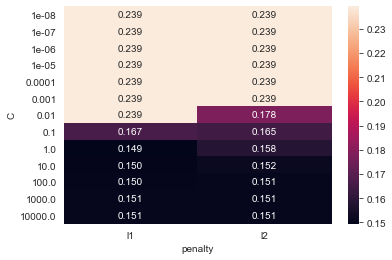

In [16]:
import seaborn as sns; sns.set_style('white')  # plot formatting
# Taking the average of the 5 trials to create 1 heat map based on the averages
heat_results['mean_score_acc'] = heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( heat_results.query('solver=="saga"').pivot('C','penalty','mean_score_acc'),
             annot=True, fmt='.3f')
heat_results

,svm_classifier,C,degree,kernel,gamma,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"SVC(C=0.01, kernel='poly')",1.000000e-07,2.0,poly,NaN,0.2406,0.2304,0.2478,0.2340,0.2406,0.2458,0.2470,0.2458,0.2404,0.2316,0.24040
1,"SVC(C=0.01, kernel='poly')",1.000000e-07,3.0,poly,NaN,0.2406,0.2304,0.2478,0.2340,0.2406,0.2458,0.2470,0.2458,0.2404,0.2316,0.24040
2,"SVC(C=0.01, kernel='poly')",1.000000e-06,2.0,poly,NaN,0.2406,0.2304,0.2478,0.2340,0.2406,0.2458,0.2470,0.2458,0.2404,0.2316,0.24040
3,"SVC(C=0.01, kernel='poly')",1.000000e-06,3.0,poly,NaN,0.2406,0.2304,0.2478,0.2340,0.2406,0.2458,0.2470,0.2458,0.2404,0.2316,0.24040
4,"SVC(C=0.01, kernel='poly')",1.000000e-05,2.0,poly,NaN,0.2406,0.2304,0.2478,0.2340,0.2406,0.2458,0.2470,0.2458,0.2404,0.2316,0.24040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"SVC(C=1000.0, gamma=0.005)",1.000000e+03,NaN,rbf,0.05,0.1716,0.1826,0.1834,0.1742,0.1836,0.1848,0.1868,0.1832,0.1816,0.1760,0.18078
117,"SVC(C=1000.0, gamma=0.005)",1.000000e+03,NaN,rbf,0.10,0.1764,0.1824,0.1872,0.1810,0.1902,0.1876,0.1876,0.1862,0.1892,0.1768,0.18446
118,"SVC(C=1000.0, gamma=0.005)",1.000000e+03,NaN,rbf,0.50,0.1926,0.1958,0.1968,0.1976,0.2050,0.2004,0.1984,0.1992,0.1978,0.1834,0.19670
119,"SVC(C=1000.0, gamma=0.005)",1.000000e+03,NaN,rbf,1.00,0.1934,0.1984,0.2020,0.1974,0.2108,0.2116,0.2016,0.2118,0.1994,0.1914,0.20178


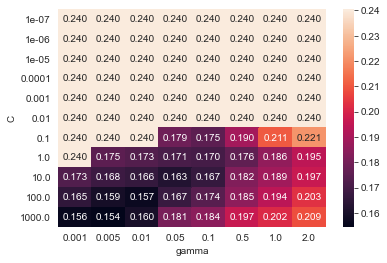

In [17]:
svm_heat_results['mean_score_acc'] = svm_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( svm_heat_results.query('kernel=="rbf"').pivot('C','gamma','mean_score_acc'),
             annot=True, fmt='.3f')
svm_heat_results

,knn_classifier,metric,n_neighbors,weights,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,uniform,0.2192,0.2224,0.2020,0.2220,0.2044,0.2176,0.2152,0.2234,0.2148,0.2234,0.21644
1,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,distance,0.2192,0.2224,0.2020,0.2220,0.2044,0.2176,0.2152,0.2234,0.2148,0.2234,0.21644
2,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,uniform,0.1876,0.1876,0.1762,0.1904,0.1760,0.1944,0.1836,0.1898,0.1834,0.1900,0.18590
3,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,distance,0.1964,0.1970,0.1852,0.1958,0.1826,0.1924,0.1904,0.2006,0.1920,0.1966,0.19290
4,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,uniform,0.1786,0.1856,0.1700,0.1832,0.1746,0.1854,0.1796,0.1784,0.1766,0.1804,0.17924
5,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,distance,0.1870,0.1966,0.1796,0.1880,0.1800,0.1854,0.1834,0.1892,0.1834,0.1906,0.18632
6,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,uniform,0.1776,0.1840,0.1732,0.1794,0.1716,0.1820,0.1786,0.1716,0.1752,0.1780,0.17712
7,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,distance,0.1840,0.1914,0.1748,0.1822,0.1748,0.1796,0.1836,0.1808,0.1816,0.1872,0.18200
8,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,uniform,0.1774,0.1800,0.1714,0.1782,0.1732,0.1838,0.1784,0.1712,0.1772,0.1820,0.17728
9,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,distance,0.1814,0.1874,0.1712,0.1802,0.1734,0.1798,0.1826,0.1750,0.1802,0.1880,0.17992


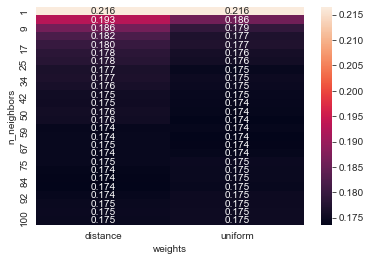

In [18]:
knn_heat_results['mean_score_acc'] = knn_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( knn_heat_results.pivot('n_neighbors','weights','mean_score_acc'),
             annot=True, fmt='.3f')
knn_heat_results

,dt_classifier,ccp_alpha,criterion,max_depth,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"DecisionTreeClassifier(criterion='entropy', ma...",0.000,gini,1,0.2482,0.2482,0.2474,0.2412,0.2354,0.2482,0.2392,0.2344,0.2380,0.2582,0.24384
1,"DecisionTreeClassifier(criterion='entropy', ma...",0.000,gini,2,0.1702,0.1766,0.1716,0.1752,0.1660,0.2012,0.1888,0.1648,0.1624,0.1794,0.17562
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.000,gini,3,0.1570,0.1616,0.1558,0.1592,0.1520,0.1684,0.1772,0.1512,0.1496,0.1644,0.15964
3,"DecisionTreeClassifier(criterion='entropy', ma...",0.000,gini,4,0.1570,0.1516,0.1502,0.1600,0.1448,0.1674,0.1726,0.1458,0.1496,0.1626,0.15616
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.000,gini,5,0.1580,0.1510,0.1484,0.1584,0.1466,0.1670,0.1596,0.1438,0.1492,0.1612,0.15432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"DecisionTreeClassifier(criterion='entropy', ma...",0.035,gini,5,0.1928,0.2482,0.2474,0.2412,0.2354,0.2482,0.2392,0.2344,0.2114,0.2582,0.23564
113,"DecisionTreeClassifier(criterion='entropy', ma...",0.035,gini,6,0.1928,0.2482,0.2474,0.2412,0.2354,0.2482,0.2392,0.2344,0.2114,0.2582,0.23564
114,"DecisionTreeClassifier(criterion='entropy', ma...",0.035,gini,7,0.1928,0.2482,0.2474,0.2412,0.2354,0.2482,0.2392,0.2344,0.2114,0.2582,0.23564
115,"DecisionTreeClassifier(criterion='entropy', ma...",0.035,gini,8,0.1928,0.2482,0.2474,0.2412,0.2354,0.2482,0.2392,0.2344,0.2114,0.2582,0.23564


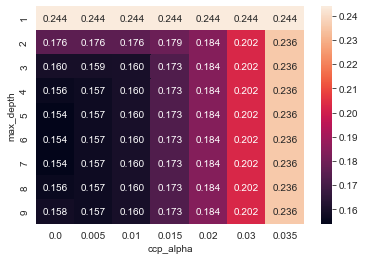

In [19]:
dt_heat_results['mean_score_acc'] = dt_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
dt_cleaned = dt_heat_results.drop_duplicates(['max_depth','ccp_alpha'])
sns.heatmap( dt_cleaned.pivot('max_depth','ccp_alpha','mean_score_acc'),
             annot=True, fmt='.3f')
dt_cleaned

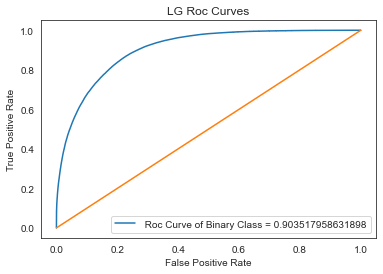

In [20]:
#https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.metrics import roc_curve, auc
# Concating the list together
lg_Y_test = pd.concat(lg_Y_test_list)
lg_Y_pred = np.concatenate(lg_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(lg_Y_test,lg_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LG Roc Curves")
plt.show()

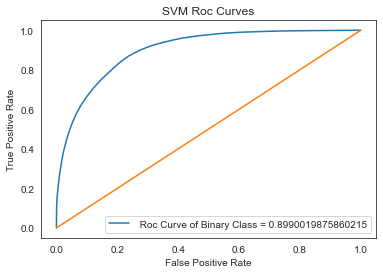

In [21]:
# Concating the list together
svm_Y_test = pd.concat(svm_Y_test_list)
svm_Y_pred = np.concatenate(svm_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(svm_Y_test,svm_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Roc Curves")
plt.show()

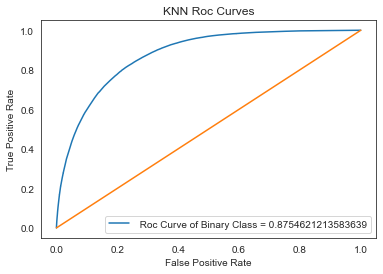

In [22]:
# Concating the list together
knn_Y_test = pd.concat(knn_Y_test_list)
knn_Y_pred = np.concatenate(knn_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(knn_Y_test,knn_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Roc Curves")
plt.show()

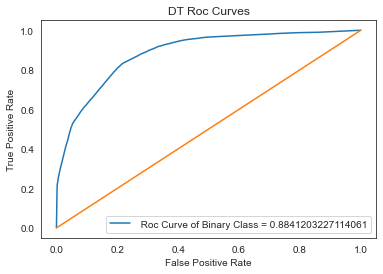

In [23]:
# Concating the list together
dt_Y_test = pd.concat(dt_Y_test_list)
dt_Y_pred = np.concatenate(dt_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(dt_Y_test,dt_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT Roc Curves")
plt.show()